[0.73955435 0.09929906 0.16114661]


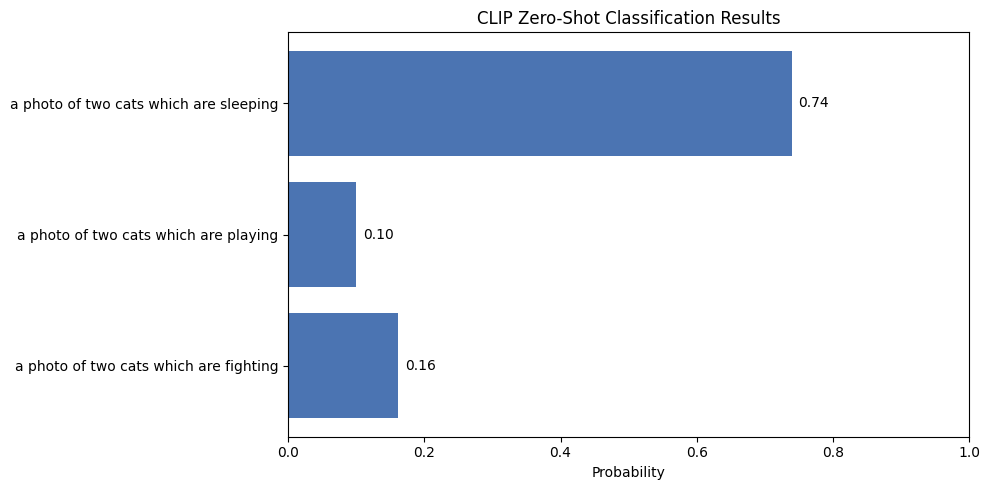

In [4]:
import os
from PIL import Image
from transformers import CLIPProcessor, CLIPModel
import matplotlib.pyplot as plt
import torch

# 设置从https://hf-mirror.com下载模型，否则会从huggingface.co下载
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

# 加载CLIP模型
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
# 处理图像和文本的工具
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
# 打开图像文件
image = Image.open(r"C:\Users\-吕继亮\Desktop\2.jpg")

# 定义文本标签
labels = [ "a photo of two cats which are sleeping", "a photo of two cats which are playing", "a photo of two cats which are fighting"]
inputs = processor(text=labels, images=image, return_tensors="pt", padding=True)

# 将图像和文本输入模型
outputs = model(**inputs)

# 图像与文本之间的相似度分数
logits_per_image = outputs.logits_per_image

# 计算概率
probs = logits_per_image.softmax(dim=1).detach().cpu().numpy()[0]
print(probs)

# 可视化概率分布
plt.figure(figsize=(10, 5))
bars = plt.barh(labels, probs, color='#4B74B2')
plt.xlabel('Probability')
plt.title('CLIP Zero-Shot Classification Results')
plt.xlim(0, 1)
for bar, score in zip(bars, probs):
    plt.text(score + 0.01, bar.get_y() + bar.get_height()/2, f"{score:.2f}", va='center')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Device set to use cpu


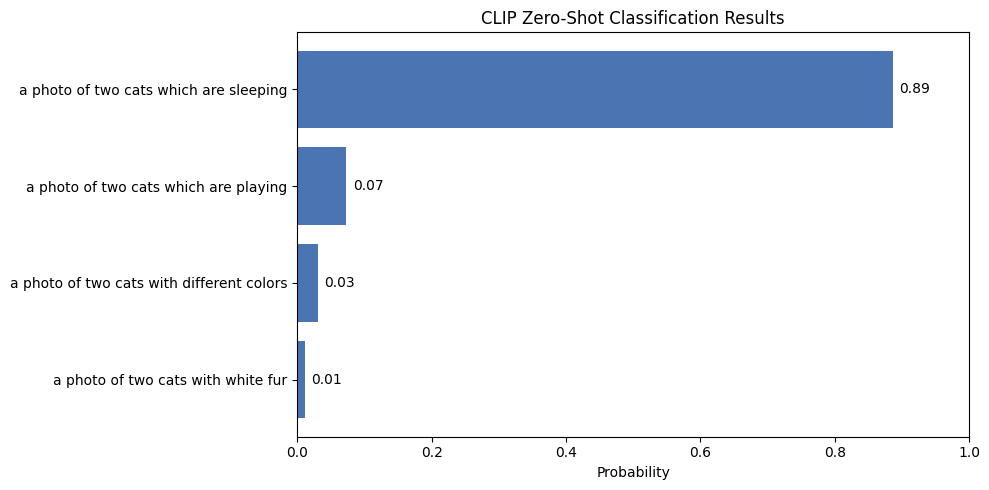

In [2]:
import os
import torch
from transformers import pipeline
import matplotlib.pyplot as plt

os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

clip = pipeline(
   task="zero-shot-image-classification",
   model="openai/clip-vit-base-patch32",
   torch_dtype=torch.bfloat16,
   device=0
)

labels = [
    "a photo of two cats which are playing",
    "a photo of two cats with different colors",
    "a photo of two cats with white fur",
    
    "a photo of two cats which are sleeping"
]

result = clip(r"C:\Users\-吕继亮\Desktop\2.jpg", candidate_labels=labels)

# 提取label和score
label_names = [item['label'] for item in result]
scores = [item['score'] for item in result]

# 可视化
plt.figure(figsize=(10, 5))
bars = plt.barh(label_names, scores, color='#4B74B2')
plt.xlabel('Probability')
plt.title('CLIP Zero-Shot Classification Results')
plt.xlim(0, 1)
for bar, score in zip(bars, scores):
    plt.text(score + 0.01, bar.get_y() + bar.get_height()/2, f"{score:.2f}", va='center')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()